In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv("C:\Dr. Yogesh\Datasets\melb_data.csv")

data.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [7]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [10]:
data.isnull().sum()
# data = data.dropna(axis=0,how='any')
# data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [11]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6196.000000,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.068828e+06,9.751097,3101.947708,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,-37.807904,144.990201,7435.489509
std,0.971079,6.751564e+05,5.612065,86.421604,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,0.075850,0.099165,4337.698917
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.200000e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198,4383.750000
50%,3.000000,8.800000e+05,9.000000,3081.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800,6567.000000
75%,4.000000,1.325000e+06,12.400000,3147.000000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000


**Decision Tree Regression**

In [13]:
y = data['Price']     #Prediction Target

In [14]:
y

1        1035000.0
2        1465000.0
4        1600000.0
6        1876000.0
7        1636000.0
           ...    
12205     601000.0
12206    1050000.0
12207     385000.0
12209     560000.0
12212    2450000.0
Name: Price, Length: 6196, dtype: float64

In [17]:
x = data[['Rooms','Bathroom','Landsize','Lattitude','Longtitude']]

In [21]:
x.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [9]:
x.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


In [22]:
model = DecisionTreeRegressor()

model.fit(x,y)

DecisionTreeRegressor()

In [37]:
# print("Making predictions")
# print(x)

# print("Predictions : ")
# a = model.predict(x)
# a

In [35]:
# data.head(3)

In [36]:
# mean_absolute_error(y,a)

In [38]:
X_train, X_test, y_train, y_test= train_test_split(x,y,random_state=0)

In [39]:
model = DecisionTreeRegressor()

model.fit(x,y)

DecisionTreeRegressor()

In [44]:
# X_train
# X_test
# y_test

In [45]:
y_pred = model.predict(X_test)

In [46]:
y_pred

array([ 815000.,  655000.,  957500., ...,  200000., 1002000., 1710000.])

In [49]:
from sklearn.metrics import r2_score

In [47]:
print(mean_absolute_error(y_pred,y_test))

1018.2375726275017


In [50]:
print(r2_score(y_pred,y_test))

0.9998624159001044


In [67]:
def get_mae(leaf_nodes,X_train,X_test,y_train,y_test):
    model = DecisionTreeRegressor()
    model.fit(x,y)
    y_pred = model.predict(X_test)
    score=r2_score(y_pred,y_test)
    return(score)
   
    

In [70]:
for leaf_nodes in np.arange(5,5000,500):
    score = get_mae(leaf_nodes,X_train,X_test,y_train,y_test)
    print(leaf_nodes,"  >>>>>>>>>>  ",score)

5   >>>>>>>>>>   0.9998624159001044
505   >>>>>>>>>>   0.9998624159001044
1005   >>>>>>>>>>   0.9998624159001044
1505   >>>>>>>>>>   0.9998624159001044
2005   >>>>>>>>>>   0.9998624159001044
2505   >>>>>>>>>>   0.9998624159001044
3005   >>>>>>>>>>   0.9998624159001044
3505   >>>>>>>>>>   0.9998624159001044
4005   >>>>>>>>>>   0.9998624159001044
4505   >>>>>>>>>>   0.9998624159001044


In [71]:
import matplotlib.pyplot as plt
from sklearn import tree


[Text(0.6398187633909299, 0.9833333333333333, 'x[0] <= 3.5\nsquared_error = 455762632164.557\nsamples = 6196\nvalue = 1068828.202'),
 Text(0.3644021539204058, 0.95, 'x[0] <= 2.5\nsquared_error = 231091546371.61\nsamples = 4600\nvalue = 892052.488'),
 Text(0.1566649263582215, 0.9166666666666666, 'x[2] <= 80.5\nsquared_error = 96508098732.512\nsamples = 2059\nvalue = 675606.991'),
 Text(0.05775895122273655, 0.8833333333333333, 'x[0] <= 1.5\nsquared_error = 39755215618.225\nsamples = 898\nvalue = 539603.746'),
 Text(0.02268041989831421, 0.85, 'x[3] <= -37.772\nsquared_error = 14703836162.19\nsamples = 242\nvalue = 393070.455'),
 Text(0.011797418237412448, 0.8166666666666667, 'x[4] <= 144.893\nsquared_error = 15006877715.025\nsamples = 209\nvalue = 406493.062'),
 Text(0.0008939410100517572, 0.7833333333333333, 'x[3] <= -37.811\nsquared_error = 3600410000.0\nsamples = 10\nvalue = 280300.0'),
 Text(0.000325069458200639, 0.75, 'x[3] <= -37.85\nsquared_error = 216666666.667\nsamples = 3\nvalue

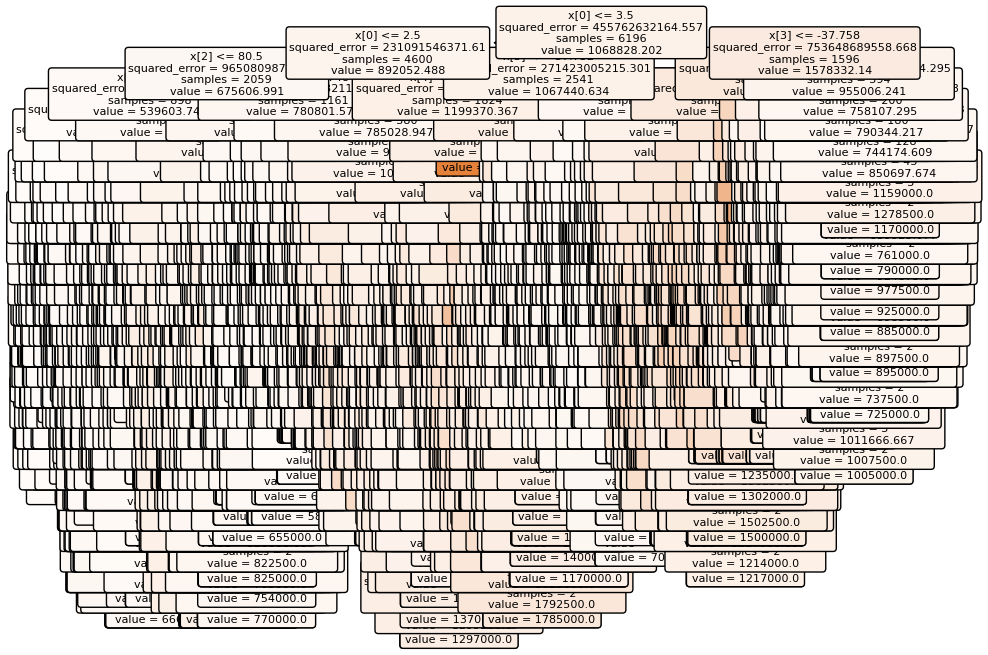

In [72]:
plt.figure(figsize=(10,8))
tree.plot_tree(model,filled=True, rounded=True,fontsize=8 )